## Как менялись мировые тренды в музыке?


<img src='spotify_logo.png' width=150 align="right"/>

#### Подготовил: Копущу Артём


<img src='Kaggle_logo.png' width=450 align="middle" />

---

Данные взяты с сайта [Kaggle](https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019)

<h2 style="text-align:center">Стандартный вид </h2>
<img src='excel_look.png' width=1200 height=2040 align="middle" />

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(9,5)})
sns.set(font_scale = 1.4)

columns = ["title", "artist", "bpm", "nrgy", "dB", "val", "dur", "top year", "top genre"]

data = pd.read_excel("spotify_songs.xlsx", usecols=columns)
data = data.rename(columns={"val":"mood", "top genre":"genre"})

In [2]:
data.head()

,title,artist,genre,bpm,nrgy,dB,mood,dur,top year
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,-6,23,203,2010
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,-4,83,192,2010
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,-7,96,243,2010
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,-4,38,180,2010
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,-6,74,268,2010



<h2 style="text-align:center">Кто является самым "хитовым" исполнителем?</h2>

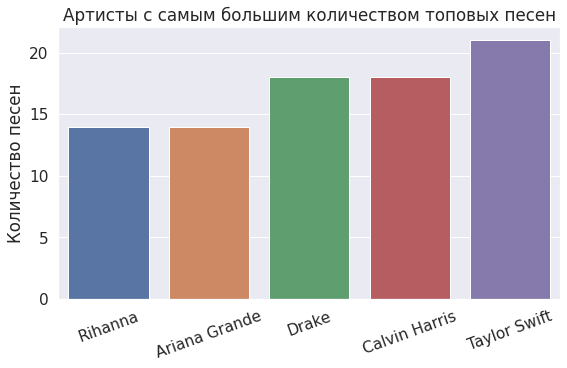

In [3]:

most_hitting_songs = data.groupby("artist")["title"].count().reset_index()
most_hitting_songs.columns = ["Artist", "Number of Songs"]

most_hitting_songs = most_hitting_songs.sort_values(by="Number of Songs", ascending=True).tail(5)
sns.barplot(x=most_hitting_songs["Artist"], 
            y=most_hitting_songs["Number of Songs"]).set(title="Артисты с самым большим количеством топовых песен", 
                                                        xlabel="",
                                                        ylabel="Количество песен")
plt.xticks(rotation=20)
plt.show()

<h2 style="text-align:center"> Как менялись числовые характеристики песен? </h2>

In [4]:
line_plot = data.iloc[:,2:]
line_plot = line_plot.groupby("top year").mean()
line_plot

,bpm,nrgy,dB,mood,dur
top year,,,,,
2010,119.56,76.65,-4.95,56.74,226.45
2011,127.29,76.10,-5.16,54.85,230.19
2012,123.10,74.07,-5.53,53.29,226.38
2013,119.91,72.44,-5.63,53.05,229.49
2014,119.73,71.03,-5.46,50.95,227.90
2015,120.86,67.53,-5.81,46.82,218.46
2016,115.77,65.80,-5.97,46.92,219.86
2017,122.02,63.16,-6.08,47.72,221.04
2018,120.55,65.45,-5.83,47.56,208.79


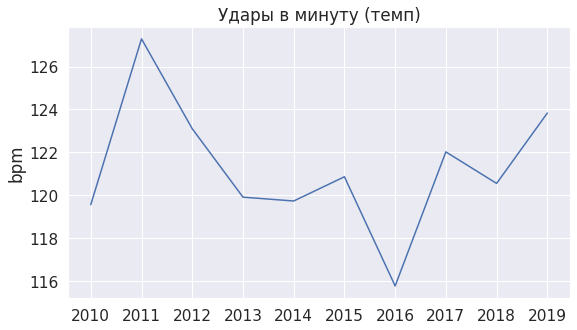

In [5]:
sns.lineplot(data=line_plot, x="top year", y="bpm").set(xticks=line_plot.index, title="Удары в минуту (темп)", xlabel="")
plt.show()

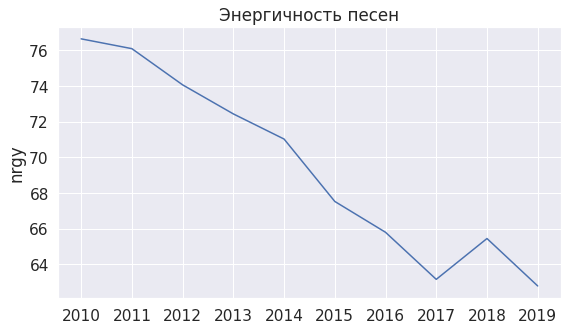

In [6]:
sns.lineplot(data=line_plot, x="top year", y="nrgy").set(xticks=line_plot.index, title="Энергичность песен", xlabel="")
plt.show()

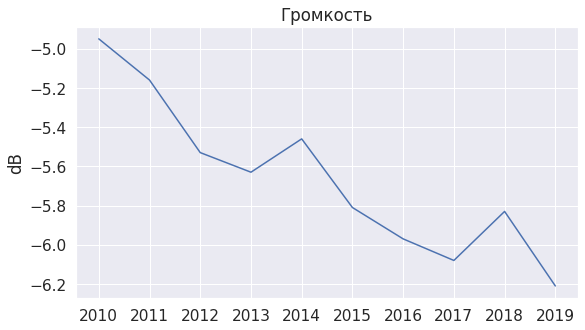

In [8]:
sns.lineplot(data=line_plot, x="top year", y="dB").set(xticks=line_plot.index, title="Громкость", xlabel="")
plt.show()

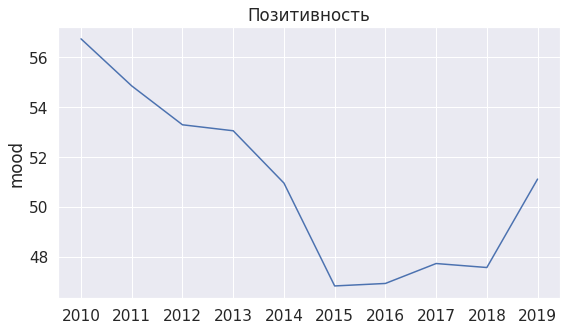

In [9]:
sns.lineplot(data=line_plot, x="top year", y="mood").set(xticks=line_plot.index, title="Позитивность", xlabel="")
plt.show()

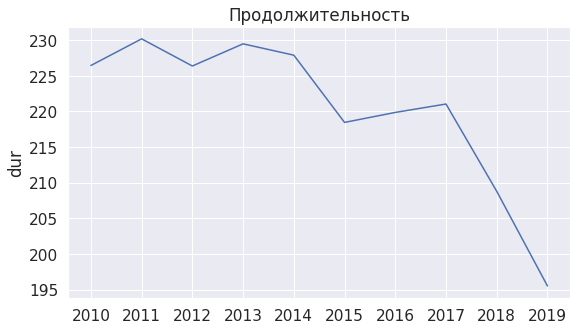

In [10]:
sns.lineplot(data=line_plot, x="top year", y="dur").set(xticks=line_plot.index, title="Продолжительность", xlabel="")
plt.show()

<h2 style="text-align:center"> А как же изменилось распределение жанров? </h2>

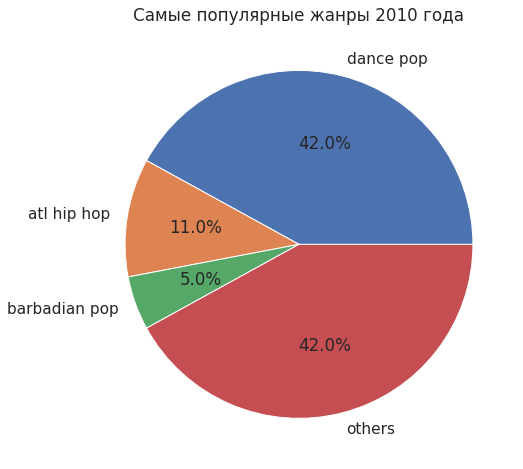

In [11]:
genres_2010 = data[data["top year"] == 2010]["genre"].value_counts().head(3)
genres_2010["others"] = 100 - genres_2010.sum()

plt.figure(figsize=(8,8))
plt.pie(genres_2010, labels=genres_2010.index, autopct='%1.1f%%')
plt.title("Самые популярные жанры 2010 года")

plt.show()

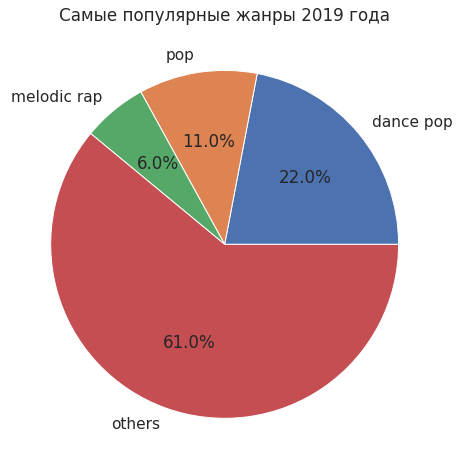

In [12]:
genres_2019 = data[data["top year"] == 2019]["genre"].value_counts().head(3)
genres_2019["others"] = 100 - genres_2019.sum()

plt.figure(figsize=(8,8))
plt.pie(genres_2019, labels=genres_2019.index, autopct='%1.1f%%')
plt.title("Самые популярные жанры 2019 года")

plt.show()

<h2 style="text-align:center"> Выводы </h2>

- Тэйлор Свифт жжет.
- Энергичные песни больше не в моде.
- Треки стали короче.
- Люди стали грустнее.
- Танцевальная музыка сдает позиции.


<h1 style="text-align:center"> Спасибо за внимание. </h1>
